## 커피 상권 분석

- 공공데이터포털의 소상공인시장진흥공단_상가(상권)정보_서울의 2022년 6월 데이터 사용
- https://www.data.go.kr/data/15083033/fileData.do

In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
from matplotlib import rcParams

In [4]:
df = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_서울_202206.csv')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346229 entries, 0 to 346228
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     346229 non-null  int64  
 1   상호명        346229 non-null  object 
 2   지점명        59038 non-null   object 
 3   상권업종대분류코드  346229 non-null  object 
 4   상권업종대분류명   346229 non-null  object 
 5   상권업종중분류코드  346229 non-null  object 
 6   상권업종중분류명   346229 non-null  object 
 7   상권업종소분류코드  346229 non-null  object 
 8   상권업종소분류명   346229 non-null  object 
 9   표준산업분류코드   323688 non-null  object 
 10  표준산업분류명    323688 non-null  object 
 11  시도코드       346229 non-null  int64  
 12  시도명        346229 non-null  object 
 13  시군구코드      346229 non-null  int64  
 14  시군구명       346229 non-null  object 
 15  행정동코드      346229 non-null  int64  
 16  행정동명       346229 non-null  object 
 17  법정동코드      346229 non-null  int64  
 18  법정동명       346229 non-null  object 
 19  지번코드       346229 non-n

In [6]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
# 필요한 컬럼만 추출

df = df[['상호명', '상권업종소분류명', '시군구명', '위도', '경도']]

In [8]:
df['상권업종소분류명'].unique()

array(['건강원', '악기판매', '시계/귀금속', '학원-입시', '한식/백반/한정식', '민속주점', '학원-디자인',
       '타이어판매', '부동산중개', '카메라판매', '족발/보쌈전문', '곱창/양구이전문', '독서실',
       '커피전문점/카페/다방', '욕탕업-종합', '주유소', '토스트전문', '삼계탕전문', '자동차정비/카센타',
       '핸드폰소매', '꽃집/꽃배달', '비만/피부관리', '사무용기기소매', '중국음식/중국집', '세차장', '기원',
       '얼음가게', '편의점', '세탁소/빨래방', '패션디자인', '아동복판매', '수퍼마켓', '컴퓨터/사무용기기종합',
       '청소/소독', '가방/가죽제품소매', '섬유/직물/주단', '정육점', '종합소매', '패밀리레스토랑', '제과점',
       '양품점', '노래방', '지물판매', '일반의류', '인테리어/욕실용품/커튼', '백화점', '사무/문구용품',
       '운동/경기용품', '번역/통역서비스', '레크레이션지도/상담', '컴퓨터/주변기기', '학원(종합)',
       '일반가전제품', '인터넷PC방', '어린이집', '떡전문', '여성미용실', '렌트카', '운동/코치학교',
       '통신판매', '사진관', '부대찌개/섞어찌개', '주방가구판매', '국수/만두/칼국수', '사업경영상담',
       '화장품판매점', '청과물소매', '안경원', '애견/애완/동물사육판매', '등산용품판매', '피아노/바이올린/기타',
       '닭내장/닭발요리', '이민유학알선', '셔터/새시판매', '죽전문점', '호프/맥주', '빠/카페/스탠드빠',
       '캐쥬얼/스포츠의류', '주택수리종합', '도시락전문점', '해장국/감자탕', '연극/음악/예술관련기타',
       '두부요리전문', '모텔/여관/여인숙', '호텔/콘도', '건강식품판매', '육류소매', '보청기판매', '골프장',
       '침구/수예품'

In [9]:
# 카페 데이터만 추출

coffee_df = df.loc[df['상권업종소분류명'] == '커피전문점/카페/다방'].reset_index(drop = True)
coffee_df

,상호명,상권업종소분류명,시군구명,위도,경도
0,커피빈,커피전문점/카페/다방,종로구,37.583149,127.000171
1,요거프레소,커피전문점/카페/다방,도봉구,37.658728,127.034746
2,우성커피숍,커피전문점/카페/다방,양천구,37.522055,126.842935
3,버블베어,커피전문점/카페/다방,강서구,37.580941,126.813358
4,알뤼르,커피전문점/카페/다방,강남구,37.504378,127.054731
...,...,...,...,...,...
19489,타이니커피브루잉스튜디오,커피전문점/카페/다방,강남구,37.526365,127.051489
19490,모센트,커피전문점/카페/다방,용산구,37.532224,126.973108
19491,베러나이브스,커피전문점/카페/다방,송파구,37.502219,127.107270
19492,빽다방,커피전문점/카페/다방,노원구,37.665192,127.066524


In [10]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19494 entries, 0 to 19493
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       19494 non-null  object 
 1   상권업종소분류명  19494 non-null  object 
 2   시군구명      19494 non-null  object 
 3   위도        19494 non-null  float64
 4   경도        19494 non-null  float64
dtypes: float64(2), object(3)
memory usage: 761.6+ KB


#### 서울시 카페 브랜드 수(상위 20개)

<AxesSubplot:>

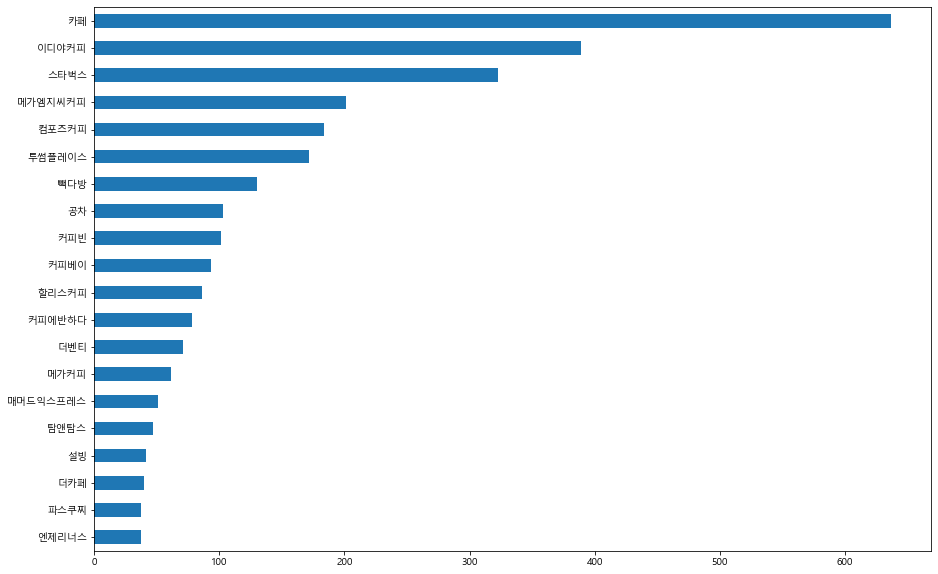

In [11]:
plt.figure(figsize = (15, 10))
coffee_df['상호명'].value_counts()[:20].sort_values().plot(kind = 'barh')

- 상호명이 카페라고 되어 있는 가게를 제외한 top3 = 이디야커피, 스타벅스, 메가엠지씨커피

#### 상위 3개 브랜드의 지역

In [12]:
top3_coffee = coffee_df.loc[coffee_df['상호명'].isin(['이디야커피', '스타벅스', '메가엠지씨커피'])]
top3_coffee

,상호명,상권업종소분류명,시군구명,위도,경도
20,이디야커피,커피전문점/카페/다방,영등포구,37.515118,126.918062
33,이디야커피,커피전문점/카페/다방,영등포구,37.519544,126.939198
34,스타벅스,커피전문점/카페/다방,종로구,37.582964,127.003887
61,이디야커피,커피전문점/카페/다방,금천구,37.449066,126.913646
65,스타벅스,커피전문점/카페/다방,양천구,37.527147,126.874682
...,...,...,...,...,...
19371,메가엠지씨커피,커피전문점/카페/다방,송파구,37.502874,127.126105
19372,메가엠지씨커피,커피전문점/카페/다방,강남구,37.502678,127.058485
19375,이디야커피,커피전문점/카페/다방,강남구,37.513882,127.053288
19379,메가엠지씨커피,커피전문점/카페/다방,관악구,37.475933,126.981149


In [13]:
# 시군구 기준으로 groupby

top3_coffee_group = pd.DataFrame(top3_coffee.groupby(['시군구명', '상호명'])['상호명'].count().reset_index(name = '매장수'))
top3_coffee_group

,시군구명,상호명,매장수
0,강남구,메가엠지씨커피,7
1,강남구,스타벅스,52
2,강남구,이디야커피,23
3,강동구,메가엠지씨커피,12
4,강동구,스타벅스,10
...,...,...,...
70,중구,스타벅스,27
71,중구,이디야커피,12
72,중랑구,메가엠지씨커피,11
73,중랑구,스타벅스,4


<AxesSubplot:xlabel='시군구명', ylabel='매장수'>

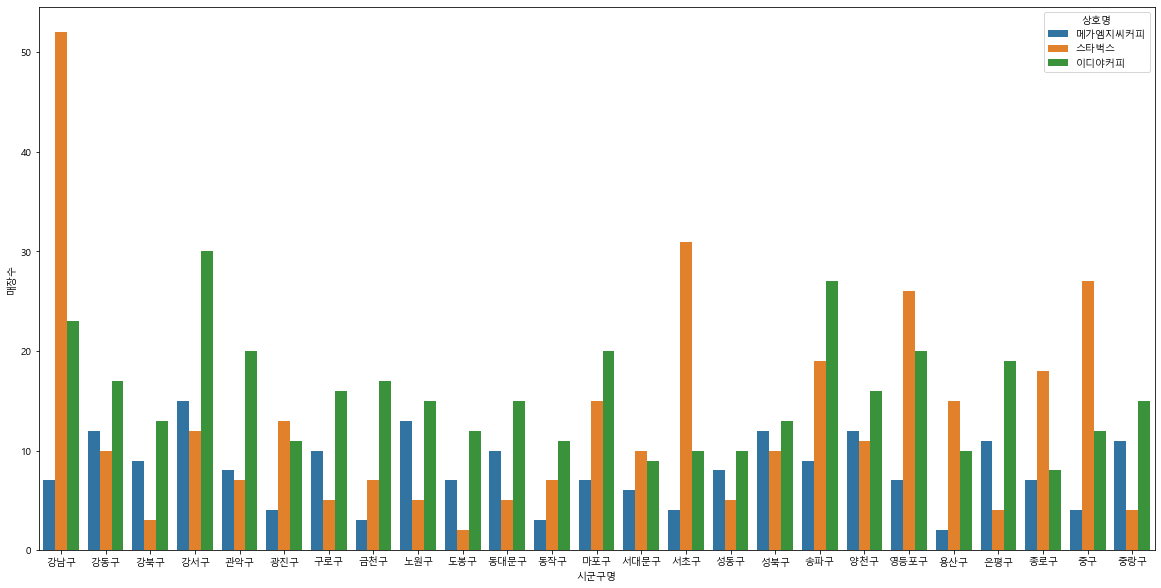

In [14]:
# 시각화

plt.figure(figsize = (20, 10))
sns.barplot(data = top3_coffee_group, x = '시군구명', y = '매장수', hue = '상호명')

#### 상위 3개 브랜드 지도 시각화

In [15]:
top3_coffee = coffee_df.loc[coffee_df['상호명'].isin(['이디야커피', '스타벅스', '메가엠지씨커피'])]
top3_coffee

,상호명,상권업종소분류명,시군구명,위도,경도
20,이디야커피,커피전문점/카페/다방,영등포구,37.515118,126.918062
33,이디야커피,커피전문점/카페/다방,영등포구,37.519544,126.939198
34,스타벅스,커피전문점/카페/다방,종로구,37.582964,127.003887
61,이디야커피,커피전문점/카페/다방,금천구,37.449066,126.913646
65,스타벅스,커피전문점/카페/다방,양천구,37.527147,126.874682
...,...,...,...,...,...
19371,메가엠지씨커피,커피전문점/카페/다방,송파구,37.502874,127.126105
19372,메가엠지씨커피,커피전문점/카페/다방,강남구,37.502678,127.058485
19375,이디야커피,커피전문점/카페/다방,강남구,37.513882,127.053288
19379,메가엠지씨커피,커피전문점/카페/다방,관악구,37.475933,126.981149


In [16]:
# 지도 중심점

mean_lat = top3_coffee['위도'].mean()
mean_lon = top3_coffee['경도'].mean()
m = folium.Map(location = [mean_lat, mean_lon], zoom_start = 11)

In [17]:
# 지도 크기 조절

f = folium.Figure(width = 1000, height = 500)
m.add_to(f)

In [18]:
# 구별 경계선

import requests
import json

# 서울시 행정구역 GeoJSON 파일
seoul_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
r = requests.get(seoul_geo)
seoul_json = json.loads(r.content)
seoul_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [19]:
# 지도에 지역구 구분 표시

m.choropleth(geo_data = seoul_json, fill_color = 'gray')
m

In [22]:
# 스타벅스

sb_map = folium.Map(location = [mean_lat, mean_lon], zoom_start = 11)
f = folium.Figure(width = 1000, height = 500)
sb_map = sb_map.add_to(f)

# 지역구 구분 색상 표시

starbucks_count = top3_coffee_group.loc[top3_coffee_group['상호명'] == '스타벅스']
sb_map.choropleth(geo_data = seoul_json, data = starbucks_count,
                 columns = ['시군구명', '매장수'],
                 fill_color = 'YlGn', color = 'gray',
                 key_on = 'properties.name',
                 fill_opacity = 0.5, line_opacity = 0.5,
                 legend_name = '지역구별 스타벅스 매장 수')
sb_map

In [23]:
# 지역구 구분 마커 추가

starbucks = top3_coffee_group.loc[top3_coffee_group['상호명'] == '스타벅스']
starbucks_coord = top3_coffee.loc[top3_coffee['상호명'] == '스타벅스']

for idx, row in starbucks_coord.iterrows():
    folium.Marker([row['위도'], row['경도']],
                 popup = '스타벅스',     
                 icon = folium.Icon(color = 'green')).add_to(sb_map)
sb_map

In [25]:
# top3 마커 표시

for idx, row in top3_coffee.iterrows():
    if row['상호명'] == '이디야커피':
        popup = '이디야커피'
        icon_color = 'blue'
    elif row['상호명'] == '스타벅스':
        popup = '스타벅스'
        icon_color = 'green'
    elif row['상호명'] == '메가엠지씨커피':
        popup = '메가엠지씨커피'
        icon_color = 'red'
    folium.Marker([row['위도'], row['경도']],
                 popup = popup,
                 icon = folium.Icon(color = icon_color)).add_to(m)
m